In [ ]:
Question:
Given a sequence of matrices, find the most efficient way to multiply these matrices together.
The problem is not actually to perform the multiplications, but merely to decide 
in which order to perform the multiplications.

We have many options to multiply a chain of matrices because matrix multiplication is associative.
In other words, no matter how we parenthesize the product, the result will be the same. For example, 
if we had four matrices A, B, C, and D, we would have:

In [ ]:
Structure of the problem:
    The last step of your multiplication is to multiply A_ik and A_kj for some k. The total cost is sum of 
    the cost of calculating A_ik and A_(k+1)j and p_i-1*p_k*p_j.

In [ ]:
# Considering the structure of the problem
The optimal solution is optimal in two ways:
    the choice of k is optimized.
    the cost of calculating A_ik and A_kj is optimized.
If any of the them is not optimzed, the final solution is not optimized.
    

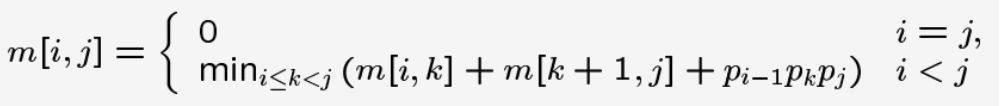

In [1]:
from IPython.display import Image
Image(filename='../screen_shot/Matrix_chain.png')

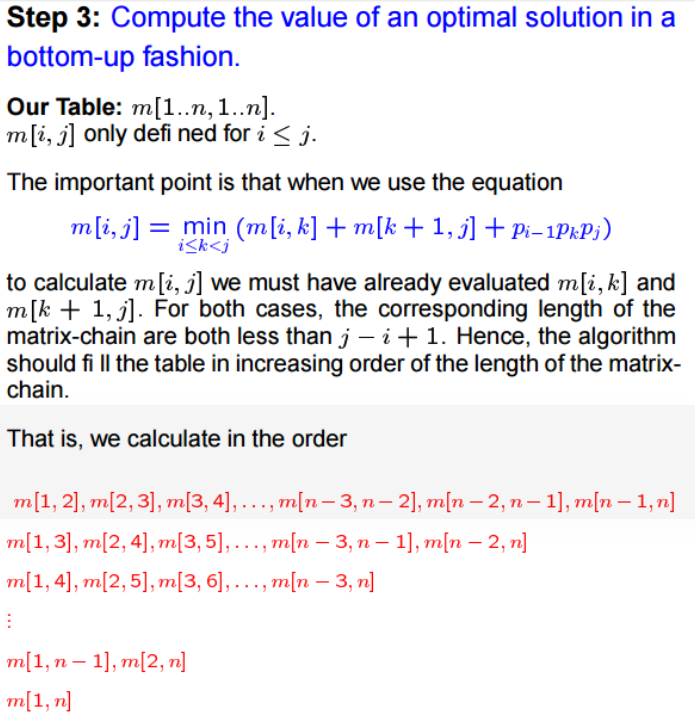

In [3]:
# When you implement a DP programming, you need to get the optimal solution for subproblems.
# warning when you compute m[i,j], two subproblems m[i,k] and m[k+1,j] are involved. But they are two problems
  # of different complexity. Like in fabnacci number problem f(n) = f(n-1) + f(n-2). The solutions to 
# the two subproblems are not computed at the same time.
Image(filename='../screen_shot/MatrixChainImplementation.png')
# The final solutio can be stored in a table, when you fill in the table you start from the diagnol
  # and all the way to the upper right corner


In [ ]:
#You start filling in the table from the diagnol all the way to the upper right corner. So the counter
# for the outer most layer of loop is the difference betwee i and j

In [36]:
# walk through the function step by step
d =[40, 20, 30, 10, 30]
#d=[5,4,6,2,7] # dimension info of the matrices
num = len(d)-1
res= [[float('inf') for x in range(num)] for y in range(num)] 

In [37]:
for dif in range(num):
    for i in range(num-dif):
        j=i+dif
        if dif==0:
            res[i][j]=0
        if dif==1:
            res[i][j]=d[i]*d[i+1]*d[j+1]
        else:
            for k in range(i,j):
                res[i][j]=min(res[i][j],res[i][k]+res[k+1][j]+d[i]*d[k+1]*d[j+1])

In [45]:
def MatrixChainMul(d):
    num = len(d)-1  # the number of matrix in the chain is one less than the length of dimension infor
    res= [[float('inf') for x in range(num)] for y in range(num)] 
    for dif in range(num):
      for i in range(num-dif):
        j=i+dif
        if dif==0:
            res[i][j]=0
        if dif==1:
            res[i][j]=d[i]*d[i+1]*d[j+1]
        else:
            for k in range(i,j):
                res[i][j]=min(res[i][j],res[i][k]+res[k+1][j]+d[i]*d[k+1]*d[j+1])
    return res[0][num-1]
    #return res

In [46]:
MatrixChainMul(d)

26000